In [59]:
## importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
## creating a pandas dataframe
df = pd.read_csv("uci-ml-phishing-dataset.csv")
df.head(5)

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [6]:
## checking general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [4]:
## cheching the datatypes of the features
df.dtypes

id                             int64
having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
P

In [5]:
## all features integers hence we can check statistical information
df.describe()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Result', ylabel='count'>

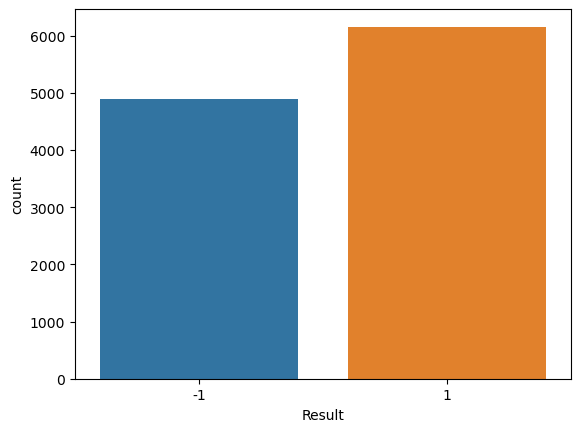

In [16]:
## checking how each class is represented
## if there is class imbalance or not and visualizing 
##  df.Result.value_counts().plot(kind='bar')
sns.countplot(x='Result',data=df)

In [15]:
## counting the number of phishing and non-phishing instances
## in the Results
class_count = df['Result'].value_counts()
print(class_count)

 1    6157
-1    4898
Name: Result, dtype: int64


In [24]:
## checking the percentage of of phishing and non phishing classes in the dataset
non_phish_count = (df[['Result']] == 1).sum()
phish_count = (df[['Result']] == -1).sum()
total_count = non_phish_count + phish_count
print("Percentage of Phishing classes: %.2f%%" %((phish_count/total_count)*100))
print("Percentage of Non-Phishing classes: %.2f%%" %((non_phish_count/total_count)*100))

Percentage of Phishing classes: 44.31%
Percentage of Non-Phishing classes: 55.69%


In [ ]:
## checking the percentage of each class 
no_count = (df)

In [8]:
## checking for missing values 
df.isnull().sum()

id                             0
having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [9]:
## there are no missing values
## we can go ahead and check for duplicate
df.duplicated().sum()

0

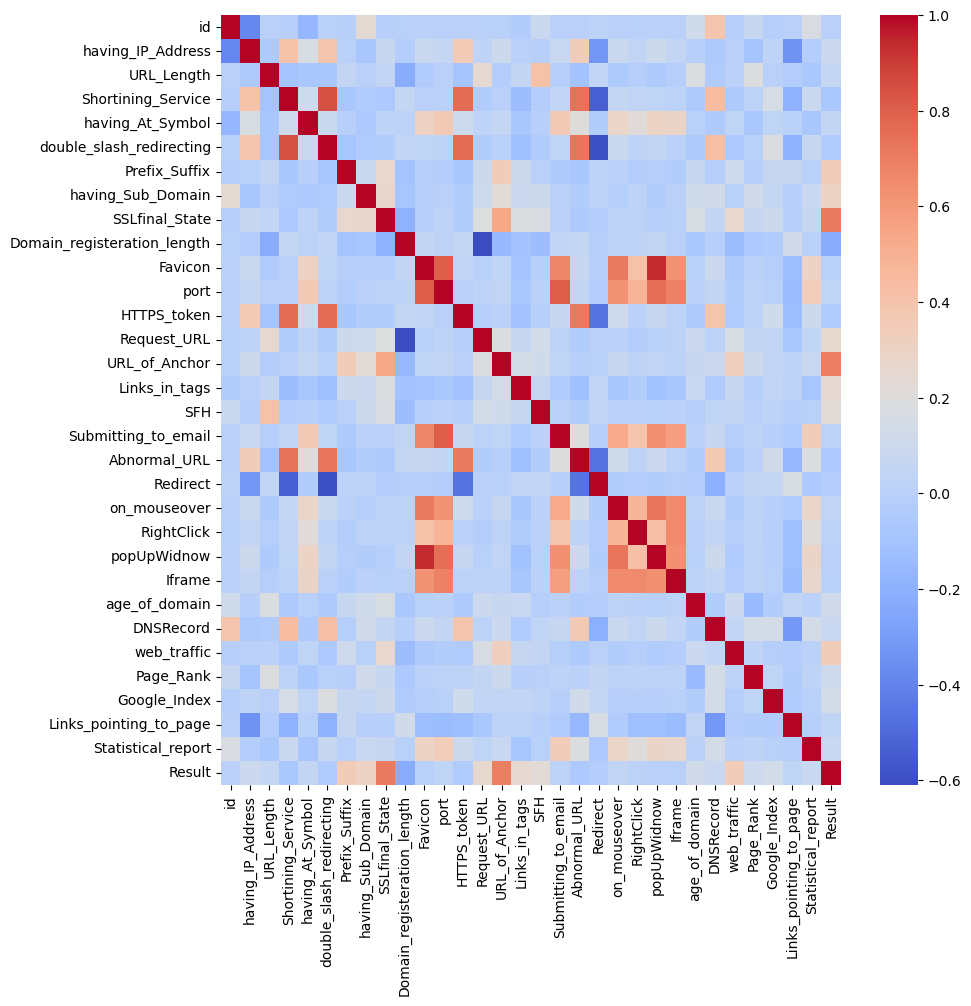

In [13]:
## there are also no duplicates
## checking correlation between features and visualising
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=None, cmap='coolwarm')
plt.show()

In [29]:
## Print out correlation with target variable
print("Amount of correlation for each feature:")
corr_quality = corr_matrix['Result']
print(corr_quality.sort_values(ascending=False))

Amount of correlation for each feature:
Result                         1.000000
SSLfinal_State                 0.714741
URL_of_Anchor                  0.692935
Prefix_Suffix                  0.348606
web_traffic                    0.346103
having_Sub_Domain              0.298323
Request_URL                    0.253372
Links_in_tags                  0.248229
SFH                            0.221419
Google_Index                   0.128950
age_of_domain                  0.121496
Page_Rank                      0.104645
having_IP_Address              0.094160
Statistical_report             0.079857
DNSRecord                      0.075718
URL_Length                     0.057430
having_At_Symbol               0.052948
on_mouseover                   0.041838
port                           0.036419
Links_pointing_to_page         0.032574
Submitting_to_email            0.018249
RightClick                     0.012653
id                             0.000978
popUpWidnow                    0.000086


In [32]:
## remove features with correlation coefficient between +/-0.03
df.drop(['Iframe','Redirect','Favicon','popUpWidnow', 'id','RightClick','Submitting_to_email'],axis=1, inplace=True)

### Preparing dataset for model training

Here we will split the data into traing and testing set
1.X : a pandas dataframe containing only features
2.y : a pandas dataframe containing only target variable
3.X_train : portion of the features to be used for model training 
4.y_train : portion of the labels/target to be used for model training
5.X_test :  portion of the dataset/dataframe to be used to make predictions after training the model
6.y_test :  portion of the labels/target to be used to measure or evaluate model accuray, precision , recall etc.


In [34]:
## separating label/target from features( separating X from y )
X = df.drop('Result', axis=1)
X.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,-1,-1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,-1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,-1,-1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,-1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,-1,0,-1,1,1,1


In [41]:
y = df['Result']
y.head()

0   -1
1   -1
2   -1
3   -1
4    1
Name: Result, dtype: int64

In [42]:
## checking the dimensions of X(features) and y(target)
print("The shape of X is : ", X.shape)
print("The shape of y is : ", y.shape)

The shape of X is :  (11055, 24)
The shape of y is :  (11055,)


In [61]:
## feature scaling
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1.383683,2.131943,0.387614,0.4196,-2.595415,-0.390849,-1.301501,-1.371855,-0.704374,0.39652,...,-0.532534,-2.405488,0.367437,-1.063235,-1.486897,-1.555270,-0.589921,0.402154,1.151029,-2.476340
1,0.722709,2.131943,0.387614,0.4196,0.385295,-0.390849,-0.078232,0.821486,-0.704374,0.39652,...,-0.532534,0.415716,0.367437,-1.063235,-1.486897,-0.347097,-0.589921,0.402154,1.151029,0.403822
2,0.722709,0.826563,0.387614,0.4196,0.385295,-0.390849,-1.301501,-1.371855,-0.704374,0.39652,...,-0.532534,-2.405488,0.367437,0.940526,-1.486897,0.861076,-0.589921,0.402154,-0.603608,-2.476340
3,0.722709,0.826563,0.387614,0.4196,0.385295,-0.390849,-1.301501,-1.371855,1.419700,0.39652,...,-0.532534,0.415716,0.367437,-1.063235,-1.486897,0.861076,-0.589921,0.402154,-2.358245,0.403822
4,0.722709,0.826563,-2.579887,0.4196,0.385295,-0.390849,1.145038,0.821486,-0.704374,0.39652,...,-0.532534,0.415716,-2.721552,-1.063235,-1.486897,-0.347097,-0.589921,0.402154,1.151029,0.403822


In [62]:
## now we can split X and y into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
## random state is set to zero to ensure reproduciability
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (7738, 24)
y_train (7738,)
X_test (3317, 24)
y_test (3317,)


### Applying Logistic regression to make predictions

In [63]:
logistic_reg = LogisticRegression()  # creating an instance of LogisticRegression classifier
logistic_reg.fit(X_train, y_train)   # fitting the model
y_pred_logistic_reg = logistic_reg.predict(X_test)  # make predictions

In [65]:
## Evaluation with confusion matrix
conf_mat_logistic_reg = metrics.confusion_matrix(y_test, y_pred_logistic_reg)
conf_mat_logistic_reg

array([[1331,  167],
       [  98, 1721]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

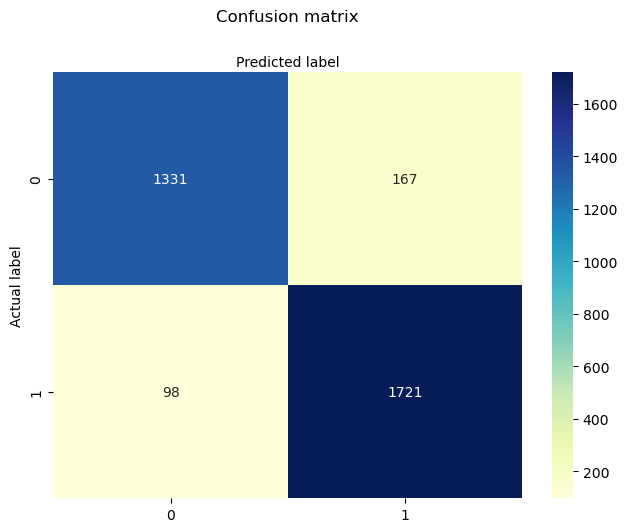

In [53]:
## visualizing the confusion matrix
class_names=[-1, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat_logistic_reg), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [66]:
## accuracy , precison and recall score report
print("Accuracy", metrics.accuracy_score(y_test, y_pred_logistic_reg))
print("Precision", metrics.precision_score(y_test, y_pred_logistic_reg))
print("Recall", metrics.recall_score(y_test, y_pred_logistic_reg))

Accuracy 0.9201085318058486
Precision 0.9115466101694916
Recall 0.9461242440901594


In [67]:
## checking precision recall, and accuracy report
print(classification_report(y_test, y_pred_logistic_reg))

              precision    recall  f1-score   support

          -1       0.93      0.89      0.91      1498
           1       0.91      0.95      0.93      1819

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



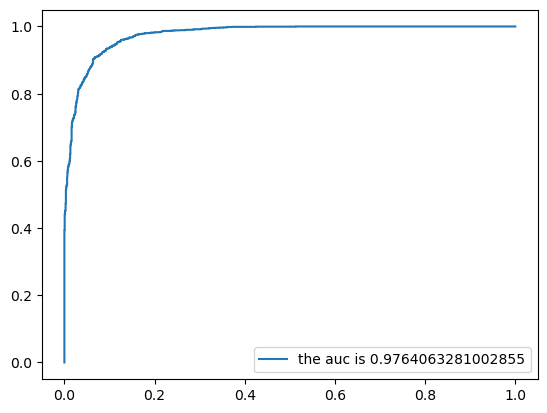

In [68]:
## ploting ROC curve
prob_y_pred_logistic_reg = logistic_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, prob_y_pred_logistic_reg)  ## why the underscore?
auc = metrics.roc_auc_score(y_test, prob_y_pred_logistic_reg)
plt.plot(fpr, tpr, label='the auc is ' + str(auc))
plt.legend(loc=4)
plt.show()